# 3. Building CellOracle base-GRN with CIRCE

In [1]:
# pip celloracle
# pip muon
# pip circe

The base GRN of **[CellOracle](https://morris-lab.github.io/CellOracle.documentation/)** are based on cis-accesibility networks obtained from scATAC-seq data. **CIRCE** now allows users to build the base GRN using a single Python environment.<br>_When CellOracle got published, **[Cicero](https://cole-trapnell-lab.github.io/cicero-release/)**, implemented in R, was the current state-of-the-art method to obtain these networks._ ([Tutorial: base GRN CellOracle¹](https://morris-lab.github.io/CellOracle.documentation/tutorials/base_grn.html))

In [2]:
import celloracle as co

which: no R in (/opt/gensoft/exe/Jupyter-Notebook/7.4.4/venv/bin:/opt/gensoft/exe/bedtools/2.31.1/scripts:/opt/gensoft/exe/bedtools/2.31.1/bin:/opt/gensoft/exe/Jupyter-Notebook/7.4.4/bin:/opt/gensoft/adm/Modules/bin:/opt/gensoft/adm/Modules/4.4.0/bin:/opt/hpc/slurm/current/bin:/opt/hpc/slurm/current/sbin:/opt/gensoft/exe/apptainer/1.3.5/scripts:/opt/gensoft/exe/apptainer/1.3.5/bin:/opt/gensoft/exe/apptainer/1.4.1/scripts:/opt/gensoft/exe/apptainer/1.4.1/bin:/opt/gensoft/exe/gcc/10.4.0/bin:/pasteur/appa/homes/rtrimbou/miniconda3/envs/snakemake/bin:/pasteur/appa/homes/rtrimbou/miniconda3/envs/snakemake/condabin:/pasteur/appa/homes/rtrimbou/.local/bin:/pasteur/appa/homes/rtrimbou/bin:/opt/gensoft/adm/Modules/bin:/opt/hpc/slurm/current/bin:/opt/hpc/slurm/current/sbin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin)


## 1. Importing scATAC-seq data

In [3]:
import muon as mu
import circe as ci

The data of this tutorial can be downloaded at [____](www.wikipedia.org)
If you have any trouble to install both CellOracle and CIRCE in the same environement, you try this conda env configuration : [CIRCE+CellOracle](https://github.com/cantinilab/Circe/circe_celloracle_env.yml)

In [4]:
data = mu.read_h5mu("pbmc10x/pbmc10x.h5mu")

## 2. Inferring DNA regions network from CIRCE


In [5]:
atac = data["atac"]
atac, atac.var_names[:3]
atac.var_names = atac.var_names.str.replace('-', '_')

In [6]:
atac = ci.add_region_infos(atac, sep=('_', '_'))

#### 2.a. Computing CIRCE metacells

In [7]:
#atac = ci.metacells.compute_metacells(atac)

#### 2.b. Inferring DNA region interactions

In [8]:
ci.compute_atac_network(atac)

Calculating alpha ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0:00:45 0:00:00

2025-09-19 09:12:45,763 - INFO - Remove client Client-e3ecd7f5-9527-11f0-a7a7-3ceceff9f2fe
2025-09-19 09:12:45,767 - INFO - Received 'close-stream' from tcp://127.0.0.1:48784; closing.
2025-09-19 09:12:45,768 - INFO - Remove client Client-e3ecd7f5-9527-11f0-a7a7-3ceceff9f2fe
2025-09-19 09:12:45,769 - INFO - Close client connection: Client-e3ecd7f5-9527-11f0-a7a7-3ceceff9f2fe
2025-09-19 09:12:45,771 - INFO - Retire worker addresses (stimulus_id='retire-workers-1758265965.7718186') (0,)
2025-09-19 09:12:45,781 - INFO - Received 'close-stream' from tcp://127.0.0.1:48782; closing.
2025-09-19 09:12:45,781 - INFO - Remove worker addr: tcp://127.0.0.1:36253 name: 0 (stimulus_id='handle-worker-cleanup-1758265965.7818978')
2025-09-19 09:12:45,782 - INFO - Lost all workers
2025-09-19 09:12:46,305 - INFO - Closing scheduler. Reason: unknown
2025-09-19 09:12:46,306 - INFO - Scheduler closing all comms


Calculating co-accessibility scores...
Concatenating results from all chromosomes...


#### 2.c. Formating network output

In [9]:
circe_network = ci.extract_atac_links(atac)

In [10]:
circe_network = circe_network.rename(
    columns = {"score": "coaccess"}
)
circe_network

,Peak1,Peak2,coaccess
0,chr16_54012525_54013025,chr16_54013534_54014034,0.669024
1,chr3_133264089_133264589,chr3_133264946_133265446,0.602914
2,chr2_109479794_109480294,chr2_109481034_109481534,0.467789
3,chr5_49599487_49599987,chr5_49600285_49600785,0.452878
4,chr2_88192716_88193216,chr2_88193738_88194238,0.446659
...,...,...,...
6129848,chr9_129777081_129777581,chr9_129869007_129869507,-0.146761
6129849,chr22_38570096_38570596,chr22_38953902_38954402,-0.148798
6129850,chr18_48896769_48897269,chr18_48940694_48941194,-0.148916
6129851,chr22_50469821_50470321,chr22_50542441_50542941,-0.150171


## 3. Connecting DNA region to gene bodies

This notebook section correspond to the CellOracle documentation: [Annotate Transcription Starting Sites²](https://morris-lab.github.io/CellOracle.documentation/notebooks/01_ATAC-seq_data_processing/option1_scATAC-seq_data_analysis_with_cicero/02_preprocess_peak_data.html#2.-Annotate-transcription-start-sites-(TSSs)%C2%B6)

#### 3.1. TSS informations

In [11]:
!module load bedtools

⚠️**You need to have bedtools available !**
<br>Otherwise, you should encounter 
>`NotImplementedError: "intersectBed" does not appear to be installed or on the path, so this method is disabled.  Please install a more recent version of BEDTools and re-import to use this method.`

If you're on a HPC, you might just have to load the package before launching the notebook: `module load bedtools`



In [12]:
from celloracle import motif_analysis as ma
# Make sure to specify the correct reference genome here
tss_annotated = ma.get_tss_info(peak_str_list=atac.var_names.values, ref_genome="hg19")

# Check results
tss_annotated.tail()

que bed peaks: 215676
tss peaks in que: 6780


,chr,start,end,gene_short_name,strand
6775,chr17,4834120,4834620,GP1BA,+
6776,chr17,4835384,4835884,GP1BA,+
6777,chr19,35484635,35485135,GRAMD1A,+
6778,chr7,100545748,100546248,MUC3A,+
6779,chr7,100546509,100547009,MUC3A,+


#### 3.2. Integrating TSS informations with cis-coaccessible network

In [15]:
integrated = ma.integrate_tss_peak_with_cicero(
    tss_peak=tss_annotated,
    cicero_connections=circe_network)
print(integrated.shape)
integrated.head()

(173536, 3)


,peak_id,gene_short_name,coaccess
0,chr10_101291541_101292041,LINC01475,1.000000
1,chr10_101291541_101292041,NKX2-3,1.000000
2,chr10_101292051_101292551,LINC01475,0.145072
3,chr10_101292051_101292551,NKX2-3,1.000000
4,chr10_101297817_101298317,LINC01475,0.000032


#### 3.3. Filtering peak connections on a specific threshold

⚠️ **As noted in [Nourisa et al, 2024 - bioXriv](https://www.biorxiv.org/content/10.1101/2024.10.16.618746v1), the threshold of 0.8 might be too high to keep any enhancer - promoter connections.**
<br>You can plot the distribution of your score, to realise how many connections you're keeping.

In [17]:
import matplotlib.pyplot as plt

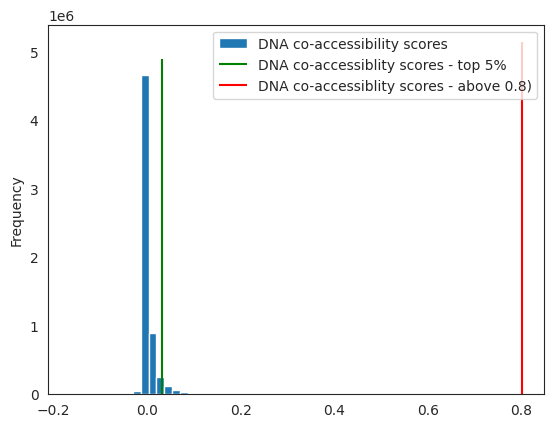

In [43]:
%matplotlib inline
default_threshold = 0.8

threshold = circe_network.coaccess.quantile(0.95) # TO CHOOSE, e.g. 5% of the connections

fig, ax = plt.subplots(1)
circe_network.coaccess.plot.hist(ax=ax, bins=50, label="DNA co-accessibility scores")  # score distribution
ax.vlines(threshold, 0, ax.get_ylim()[1], colors="green", label="DNA co-accessiblity scores - top 5%")  # threshold line
ax.vlines(default_threshold, 0, ax.get_ylim()[1], colors="red", label="DNA co-accessiblity scores - above 0.8)")  # threshold line
plt.legend()

In [44]:
peaks = integrated[integrated.coaccess >= threshold]
peaks = peaks[["peak_id", "gene_short_name"]].reset_index(drop=True)

### 4. Finding TF binding sites

In [45]:
import celloracle as co
from celloracle import motif_analysis as ma
from celloracle.utility import save_as_pickled_object
co.__version__

'0.20.0'

#### 4.1. Downloading genome - UCSC version

You need a genome sequence in order to identify the TF motifs present in the DNA regions. Genomepy manage the installation by default, but you can also 

In [46]:
import genomepy

# This link should be your genome of interest location.
fa = "https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/latest/hg19.fa.gz"

genomepy.install_genome(
    name=fa,
    provider="URL",
    localname="hg19",
)

Fasta("/pasteur/appa/homes/rtrimbou/.local/share/genomes/hg19/hg19.fa")

⚠️ **If your reference genome file are installed in non-default location**, please speficy the location using the parameter genomes_dir in the following functions.

Check that the genome has been well downloaded.

In [47]:
# Make sure reference genome has been correctly installed.
ref_genome = "hg19"

genome_installation = ma.is_genome_installed(ref_genome=ref_genome,
                                             genomes_dir=None)
print(ref_genome, "installation: ", genome_installation)

hg19 installation:  True


In [48]:
peaks = ma.check_peak_format(peaks, ref_genome, genomes_dir=None)

Peaks before filtering:  20089
Peaks with invalid chr_name:  0
Peaks with invalid length:  0
Peaks after filtering:  20089


#### 4.2. Scanning for TF motifs

In [49]:
# Instantiate TFinfo object
tfi = ma.TFinfo(peak_data_frame=peaks,
                ref_genome=ref_genome,
                genomes_dir=None)

In [50]:
%%time
# Scan motifs. !!CAUTION!! This step may take several hours if you have many peaks!
tfi.scan(fpr=0.02,
         motifs=None,  # If you enter None, default motifs will be loaded.
         verbose=True)

# Save tfinfo object
tfi.to_hdf5(file_path="test1.celloracle.tfinfo")

No motif data entered. Loading default motifs for your species ...
 Default motif for vertebrate: gimme.vertebrate.v5.0. 
 For more information, please see https://gimmemotifs.readthedocs.io/en/master/overview.html 

Initiating scanner... 



2025-09-19 09:28:31,050 - DEBUG - using background: genome hg19 with size 200


Calculating FPR-based threshold. This step may take substantial time when you load a new ref-genome. It will be done quicker on the second time. 

Motif scan started .. It may take long time.



Scanning:   0%|          | 0/13948 [00:00<?, ? sequences/s]

CPU times: user 7min 1s, sys: 5.29 s, total: 7min 7s
Wall time: 7min 14s


In [51]:
# Check motif scan results
tfi.scanned_df.head()

,seqname,motif_id,factors_direct,factors_indirect,score,pos,strand
0,chr10_101291541_101292041,GM.5.0.RFX.0001,Rfx5,"ARID2, Rfx6, Rfx8, RFX6, Rfx3, RFX5, RFX8, Rfx...",10.484102,260,1
1,chr10_101291541_101292041,GM.5.0.Nuclear_receptor.0005,"NR4A2, NR1A4, RXRA, NR1H4, FXR","Nr1h5, Nr1h4, Nr1h3, NR1H3",8.070402,454,-1
2,chr10_101291541_101292041,GM.5.0.Nuclear_receptor.0005,"NR4A2, NR1A4, RXRA, NR1H4, FXR","Nr1h5, Nr1h4, Nr1h3, NR1H3",7.774184,454,1
3,chr10_101291541_101292041,GM.5.0.Mixed.0008,,"ZBTB33, NR2C2",9.322807,448,1
4,chr10_101291541_101292041,GM.5.0.C2H2_ZF.0020,"Egr1, EGR4, EGR2, Egr3, EGR3, EGR1","Egr1, Egr4, EGR4, EGR2, Egr3, EGR3, EGR1",5.976515,124,1


#### 3.3. Filtering low score TF - peak links

In [52]:
# Reset filtering
tfi.reset_filtering()

# Do filtering
tfi.filter_motifs_by_score(threshold=10)

# Format post-filtering results.
tfi.make_TFinfo_dataframe_and_dictionary(verbose=True)

Filtering finished: 2673574 -> 581057
1. Converting scanned results into one-hot encoded dataframe.


  0%|          | 0/13922 [00:00<?, ?it/s]

2. Converting results into dictionaries.


  0%|          | 0/5237 [00:00<?, ?it/s]

  0%|          | 0/1093 [00:00<?, ?it/s]

#### 4.4. Transforming results into a TF x (peak, gene) dataframe

In [53]:
df = tfi.to_dataframe()
df.head()

,peak_id,gene_short_name,9430076C15RIK,AC002126.6,AC012531.1,AC226150.2,AFP,AHR,AHRR,AIRE,...,ZNF784,ZNF8,ZNF816,ZNF85,ZSCAN10,ZSCAN16,ZSCAN22,ZSCAN26,ZSCAN31,ZSCAN4
0,chr10_101291541_101292041,LINC01475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101291541_101292041,NKX2-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr10_101292051_101292551,LINC01475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr10_101292051_101292551,NKX2-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_101380430_101380930,SLC25A28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Saving the CellOracle base GRN

In [54]:
df.to_parquet("base_GRN_dataframe.parquet")

## 6. Fitting CellOracle GRN

This notebook section follows the CellOracle documentation: [GRN model construction and network analysis³](https://morris-lab.github.io/CellOracle.documentation/tutorials/networkanalysis.html)

⚠️ **We shortened this part of the workflow to demonstrate the use of CIRCE for CellOracle GRN.** <br>For all details on scRNA-seq data preprocessing, please refer to [CellOracle - scRNA-seq data preparation](https://morris-lab.github.io/CellOracle.documentation/tutorials/scrnaprocess.html#a-scrna-seq-data-preprocessing-with-scanpy).

During both data preprocessing and GRN inference, we make use of an `Oracle object`. This object leverages its built-in functions to calculate and store all required information for these steps. To start, we create a new Oracle instance and provide it with our gene expression dataset `anndata` along with the transcription factor information (the base GRN).

In [61]:
rna = data["rna"]

In [62]:
# Random downsampling into 30K cells if the anndata object include more than 30 K cells.
n_cells_downsample = 30000
if rna.shape[0] > n_cells_downsample:
    # Let's dowmsample into 30K cells
    sc.pp.subsample(rna, n_obs=n_cells_downsample, random_state=123)

#### 6.1. Creating the CellOracle object

In [63]:
# Instantiate Oracle object
oracle = co.Oracle()

#### 6.2. Preprocessing RNA data

18410 genes were found in the adata. Note that Celloracle is intended to use around 1000-3000 genes, so the behavior with this number of genes may differ from what is expected.


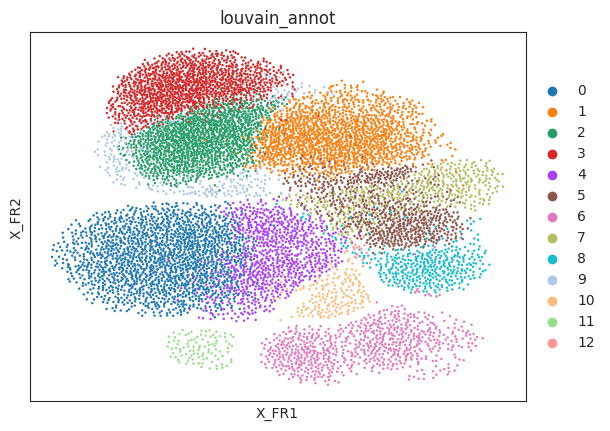

In [70]:
import scanpy as sc
import numpy as np
from scipy import sparse

# 1) Keep a copy of the *raw counts* in a layer
rna.layers["raw_count"] = rna.X.copy()

# 2) (Optional) Now you can normalize/log for your own analyses without touching raw_count
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

# 2.a) Keep the normalized counts in a layer
rna.layers["normalized_count"] = rna.X.copy()

# 3) Neighbors + clustering for 'louvain_annot'
sc.pp.pca(rna)
sc.pp.neighbors(rna)
sc.tl.louvain(rna, key_added="louvain_annot")  # or sc.tl.leiden(..., key_added="louvain_annot")
rna.obs["louvain_annot"] = rna.obs["louvain_annot"].astype("category")

# 4) ForceAtlas2 embedding (Scanpy's draw_graph)
sc.tl.draw_graph(rna)  # creates rna.obsm["X_draw_graph_fa"]

# 5) Point .X to the unscaled counts for Oracle (optional, Oracle will read from layers below)
rna.X = rna.layers["raw_count"].copy()

# 6) Import to Oracle
oracle.import_anndata_as_raw_count(
    adata=rna,
    cluster_column_name="louvain_annot",
    embedding_name="X_draw_graph_fr",
)


#### 6.3. Loading prior base GRN

In [71]:
# You can load TF info dataframe with the following code.
oracle.import_TF_data(TF_info_matrix=df)

TF dict already exists. The old TF dict data was deleted. 



#### 6.4. Calculating KNN for cell proximity and trajectories

Compute PCA and select a small number of components.

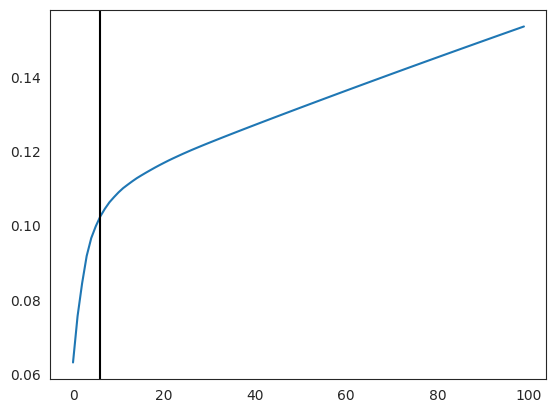

6


In [72]:
# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

Defining a number of neighbors for KNN imputation.

In [73]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

cell number is :9631
Auto-selected k is :240


Computing k-nearest neighbors.

In [74]:
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

In [ ]:
# Check clustering data
sc.pl.draw_graph(oracle.adata, color="louvain_annot")

#### 6.5. Inferring  cluster-specific GRN

In [76]:
%%time
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
links = oracle.get_links(cluster_name_for_GRN_unit="louvain_annot", alpha=10,
                         verbose_level=10)

  0%|          | 0/13 [00:00<?, ?it/s]

Inferring GRN for 0...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 1...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 10...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 11...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 12...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 2...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 3...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 4...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 5...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 6...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 7...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 8...


  0%|          | 0/3845 [00:00<?, ?it/s]

Inferring GRN for 9...


  0%|          | 0/3845 [00:00<?, ?it/s]

CPU times: user 1h 22min 15s, sys: 4min 40s, total: 1h 26min 55s
Wall time: 1h 48min 31s


In [79]:
!conda env export > circe_celloracle_env.yml